<a href="https://colab.research.google.com/github/Herodegon/ECGR4105-Intro-to-Machine-Learning/blob/main/Assignment2_GradientDescent2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this assignment, we will use US Housing dataset. You will develop linear regression with gradient decent algorithm to estimate the price of the house. In this assignment, we will use 80% and 20% split between training and evaluation (test) sets across all problems. (Note: You cannot use the built-in function from ML libraries for gradient descent, you must implement it yourself. However, you can use built-in function for normalization/standardization)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file_path = '/content/drive/MyDrive/ECGR4105/HW2_Housing.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))
M=len(dataset)
M

545

In [3]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Problem 1 (30 points)

1.a) Develop a gradient decent training and evaluation code, from scratch, that predicts housing price based on the following input variables:

area, bedrooms, bathrooms, stories, parking

Identify the best parameters for your linear regression model, based on the above input variables.

Plot the training and validation losses (in a single graph, but two different lines). For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best.

In [4]:
X_1 = dataset.iloc[:,[1,2,3,4,10]].values  # Get input values from each explanatory variable (Area, Bedrooms, Bathrooms, Stories, Parking)
Y_1 = dataset.iloc[:,0].values             # Get output values (Price of Housing)
m = int(np.floor(len(X_1)*0.8))            # Number of training examples
n = int(np.floor(len(X_1)*0.2))            # Number of validation examples

print("X_area = ", np.hstack(X_1[:5,0]))
print("X_bedrooms = ", np.hstack(X_1[:5,1]))
print("X_bathrooms = ", np.hstack(X_1[:5,2]))
print("X_stories = ", np.hstack(X_1[:5,3]))
print("X_parking = ", np.hstack(X_1[:5,4]))
print("Y = ", np.hstack(Y_1[:5]))
print("m = ", m)
print("n = ", n)

X_area =  [7420 8960 9960 7500 7420]
X_bedrooms =  [4 4 3 4 4]
X_bathrooms =  [2 4 2 2 1]
X_stories =  [3 4 2 2 2]
X_parking =  [2 3 2 3 2]
Y =  [13300000 12250000 12250000 12215000 11410000]
m =  436
n =  109


Using the input and output data gathered from the dataset, we now want to create randomized datasets for training and testing the model. This will be done using the `train_test_split` function from the `sklearn` library. For the train/test ratio, we'll be using an 80/20 split (as shown by variables `m` and `n` above respectively)



In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_1, Y_1, test_size = 0.20, random_state = 0)

In [6]:
# Creates a training table using input data X and stacks data together horizontally
def ConstructData(X,m):
  X_0 = np.ones((m,1))
  X_1 = X[:m,0].reshape(m,1)
  data = np.hstack((X_0,X_1))
  if X.shape[1] > 1:
    for i in range(1,X.shape[1]):
      X_n = X[:m,i].reshape(m,1)
      data = np.hstack((data,X_n)) # Construct feature matrix
  return data

In [7]:
def ComputeCost(X,Y,theta):
  predictions = X.dot(theta)                  # Scales X array by current theta value
  errors = np.subtract(predictions,Y)         # Computes the difference between every element of predictions[] and Y[]
  square_errors = np.square(errors)           # Squares the resulting error
  cost = (1/(2*m))*np.sum(square_errors)      # Computes the cost equation {(1/(2*m))*(predictions[]-Y[])^2}
  return cost

def GradientDescent(X,Y,theta,alpha,iterations):
  cost_history = np.zeros(iterations)         # Initializes empty array of size "iterations"
  for i in range(iterations):
    predictions = X.dot(theta)                # Scales X array by current theta value
    errors = np.subtract(predictions,Y)       # Computes the difference between every element of predictions[] and Y[]
    sum_delta = (alpha/m)*X.T.dot(errors)     # Solves for the sum of delta functions (errors)
    theta = theta - sum_delta                 # New theta is found by taking the difference between current value and solved delta value
    cost_history[i] = ComputeCost(X,Y,theta)  # Computes the cost for the current theta value
  return theta, cost_history

In [8]:
# Construct Tables For Use in Linear Regression
X_feature = ConstructData(X_train,m)
X_test_feature = ConstructData(X_test,n)
print(X_feature[:5])

[[1.00e+00 3.62e+03 2.00e+00 1.00e+00 1.00e+00 0.00e+00]
 [1.00e+00 4.00e+03 2.00e+00 1.00e+00 1.00e+00 0.00e+00]
 [1.00e+00 3.04e+03 2.00e+00 1.00e+00 1.00e+00 0.00e+00]
 [1.00e+00 3.60e+03 2.00e+00 1.00e+00 1.00e+00 0.00e+00]
 [1.00e+00 9.86e+03 3.00e+00 1.00e+00 1.00e+00 0.00e+00]]


In [9]:
iterations = 50
alpha_values = np.arange(0.01,0.11,0.01)
theta_values = np.zeros((1,len(alpha_values),X_feature.shape[1]))     # Construct 3D-array to hold each pair of theta values for every alpha and X
training_cost_values = np.zeros((1,len(alpha_values),iterations))     # Construct 3D-array to hold each set of cost history for every alpha and X
validation_cost_values = np.zeros((1,len(alpha_values),iterations))   # Construct 3D-array to hold each set of cost history for every alpha and X
i = 0
j = 0
for alpha in alpha_values:
  theta = theta_values[0,j]
  theta, train_cost_history = GradientDescent(X_feature,Y_train,theta,alpha,iterations)
  print("Theta ",i, ':',j," = ",theta)
  theta_values[0,j] = theta
  training_cost_values[0,j] = train_cost_history
  theta, valid_cost_history = GradientDescent(X_test_feature,Y_test,theta,alpha,iterations)
  validation_cost_values[0,j] = valid_cost_history
  j = j+1
print("Finished Computation")

Theta  0 : 0  =  [-6.24496011e+273 -3.77065265e+277 -1.88105732e+274 -8.21337416e+273
 -1.15361933e+274 -5.22642805e+273]
Theta  0 : 1  =  [-7.03176515e+288 -4.24571869e+292 -2.11805249e+289 -9.24818048e+288
 -1.29896430e+289 -5.88490783e+288]
Theta  0 : 2  =  [-4.48372477e+297 -2.70723405e+301 -1.35055199e+298 -5.89699670e+297
 -8.28269753e+297 -3.75244429e+297]
Theta  0 : 3  =  [-7.91738190e+303             -inf             -inf -1.04129440e+304
 -1.46256255e+304 -6.62608345e+303]
Theta  0 : 4  =  [-inf  nan -inf -inf -inf  nan]
Theta  0 : 5  =  [nan nan nan nan nan nan]
Theta  0 : 6  =  [nan nan nan nan nan nan]
Theta  0 : 7  =  [nan nan nan nan nan nan]
Theta  0 : 8  =  [nan nan nan nan nan nan]
Theta  0 : 9  =  [nan nan nan nan nan nan]
Finished Computation


<ipython-input-7-13e5b3847093>:4: RuntimeWarning: overflow encountered in square
  square_errors = np.square(errors)           # Squares the resulting error
<ipython-input-7-13e5b3847093>:14: RuntimeWarning: invalid value encountered in subtract
  theta = theta - sum_delta                 # New theta is found by taking the difference between current value and solved delta value
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Cost Index =  [[0. 0.]]
Minimum Cost =  1.1155762100423009e+24


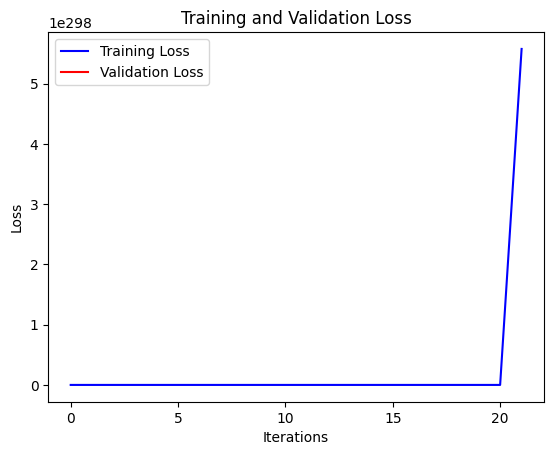

In [10]:
def PlotLinearRegression(X,Y,theta,x_label,y_label,title):
  plt.scatter(X[:,1], Y, color='b', marker= '+', label= 'Training Data')
  plt.plot(X[:,1],X.dot(theta), color='r', label='Linear Regression')     # Construct best-fit line using theta values determined by training
  plt.rcParams["figure.figsize"] = (6,4)

  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.legend()

  # Print final graph
  plt.show()
  return

def PlotLoss(training_cost_history,validation_cost_history,iterations,x_label,y_label,title):
  plt.plot(range(iterations),training_cost_history, color='b', label= 'Training Loss')
  plt.plot(range(iterations),validation_cost_history, color='r', label= 'Validation Loss')
  plt.rcParams["figure.figsize"] = (6,4)
  plt.legend()

  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)

  # Print final graph
  plt.show()
  return

# Find minimum value from cost history
def FindMinCost(cost_values):
  cost_min = cost_values[0,0,0]
  cost_index = np.zeros((1,2))
  for i in range(0,np.shape(cost_values)[0]):
    for j in range(0,np.shape(cost_values)[1]):
      test_min = np.min(cost_values[i,j])
      if test_min < cost_min:
        cost_min = test_min
        cost_index = np.array([i,j])
  return cost_min, cost_index

cost_min, cost_index = FindMinCost(training_cost_values)
print("Cost Index = ",cost_index)
print("Minimum Cost = ",cost_min)

PlotLoss(training_cost_values[0,9],training_cost_values[0,9]-validation_cost_values[0,9],iterations,"Iterations","Loss","Training and Validation Loss")

1.b) Develop a gradient decent training and evaluation code, from scratch, that predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

Identify the best parameters for your linear regression model, based on the above input variables.

Plot the training and validation losses (in a single graph, but two different lines) over your training iteration. Compare your linear regression model against problem 1 a. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best.

In [11]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
def FactorizeData(X):
  for i in range(0,X.shape[1]):
    for j in range(0,X.shape[0]):
      if X[j,i] == 'yes':
        X[j,i] = 2
      elif X[j,i] == 'no':
        X[j,i] = 1
      else:
        X[j,i] = X[j,i]
  return X

In [13]:
X_2 = dataset.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]].values  # Get input values from each explanatory variable
X_2 = FactorizeData(X_2)
Y_2 = dataset.iloc[:,0].values                          # Get output values (Price of Housing)
m_2 = int(np.floor(len(X_2)*0.8))                         # Number of training examples
n_2 = int(np.floor(len(X_2)*0.2))                         # Number of validation examples

print("X_area = ", np.hstack(X_2[:5,0]))
print("X_bedrooms = ", np.hstack(X_2[:5,1]))
print("X_bathrooms = ", np.hstack(X_2[:5,2]))
print("X_stories = ", np.hstack(X_2[:5,3]))
print("X_mainroad = ", np.hstack(X_2[:5,4]))
print("X_guestroom = ", np.hstack(X_2[:5,5]))
print("X_basement = ", np.hstack(X_2[:5,6]))
print("X_hotwaterheating = ", np.hstack(X_2[:5,7]))
print("X_airconditioning = ", np.hstack(X_2[:5,8]))
print("X_parking = ", np.hstack(X_2[:5,9]))
print("X_prefarea = ", np.hstack(X_2[:5,10]))
print("Y = ", np.hstack(Y_2[:5]))
print("m = ", m_2)
print("n = ", n_2)

X_area =  [7420 8960 9960 7500 7420]
X_bedrooms =  [4 4 3 4 4]
X_bathrooms =  [2 4 2 2 1]
X_stories =  [3 4 2 2 2]
X_mainroad =  [2 2 2 2 2]
X_guestroom =  [1 1 1 1 2]
X_basement =  [1 1 2 2 2]
X_hotwaterheating =  [1 1 1 1 1]
X_airconditioning =  [2 2 1 2 2]
X_parking =  [2 3 2 3 2]
X_prefarea =  [2 1 2 2 1]
Y =  [13300000 12250000 12250000 12215000 11410000]
m =  436
n =  109


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X_2, Y_2, test_size = 0.20, random_state = 0)
X_feature = ConstructData(X_train,m_2)
X_test_feature = ConstructData(X_test,n_2)
print(X_feature[:5])

[[1.0 3620 2 1 1 2 1 1 1 1 0 1]
 [1.0 4000 2 1 1 2 1 1 1 1 0 1]
 [1.0 3040 2 1 1 1 1 1 1 1 0 1]
 [1.0 3600 2 1 1 2 1 1 1 1 0 1]
 [1.0 9860 3 1 1 2 1 1 1 1 0 1]]


In [15]:
iterations = 50
alpha_values = np.arange(0.01,0.11,0.01)
theta_values = np.zeros((1,len(alpha_values),X_feature.shape[1]))     # Construct 3D-array to hold each pair of theta values for every alpha and X
training_cost_values = np.zeros((1,len(alpha_values),iterations))     # Construct 3D-array to hold each set of cost history for every alpha and X
validation_cost_values = np.zeros((1,len(alpha_values),iterations))   # Construct 3D-array to hold each set of cost history for every alpha and X
i = 0
j = 0
for alpha in alpha_values:
  theta = theta_values[0,j]
  theta, train_cost_history = GradientDescent(X_feature,Y_train,theta,alpha,iterations)
  print("Theta ",i, ':',j," = ",theta)
  theta_values[0,j] = theta
  training_cost_values[0,j] = train_cost_history
  theta, valid_cost_history = GradientDescent(X_test_feature,Y_test,theta,alpha,iterations)
  validation_cost_values[0,j] = valid_cost_history
  j = j+1
print("Finished Computation")

Theta  0 : 0  =  [-6.245057001158217e+273 -3.770710970529665e+277 -1.8810864944538636e+274
 -8.213501545439482e+273 -1.1536372267981412e+274 -1.1885000939207204e+274
 -7.498429161034041e+273 -8.370630446546976e+273 -6.471857263452941e+273
 -8.542803998530384e+273 -5.226508936983253e+273 -8.098781932682301e+273]


<ipython-input-7-13e5b3847093>:4: RuntimeWarning: overflow encountered in square
  square_errors = np.square(errors)           # Squares the resulting error
<ipython-input-7-13e5b3847093>:14: RuntimeWarning: invalid value encountered in subtract
  theta = theta - sum_delta                 # New theta is found by taking the difference between current value and solved delta value


Theta  0 : 1  =  [-7.031874247838778e+288 -4.245784364304953e+292 -2.1180853394699623e+289
 -9.248323913016083e+288 -1.2989844456128245e+289 -1.3382396994046838e+289
 -8.443159270914533e+288 -9.425249547655459e+288 -7.287249166520477e+288
 -9.619115314793617e+288 -5.884998902853193e+288 -9.119150730045985e+288]
Theta  0 : 2  =  [-4.4837943312214714e+297 -2.707275925776162e+301 -1.3505729345312998e+298
 -5.897088155014479e+297 -8.282826012387444e+297 -8.533132656418655e+297
 -5.383684113543679e+297 -6.009902765982189e+297 -4.646631232503242e+297
 -6.13351905903224e+297 -3.752502361367978e+297 -5.81472234966392e+297]
Theta 

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 0 : 3  =  [-7.917504731662395e+303 -inf -inf -1.0413105490866296e+304
 -1.462585241432095e+304 -1.5067845042012148e+304 -9.50653426406064e+303
 -1.0612314051775939e+304 -8.205042883760562e+303 -1.083059627277776e+304
 -6.626185994934258e+303 -1.0267663571496942e+304]
Theta  0 : 4  =  [-inf nan -inf -inf -inf -inf -inf -inf -inf -inf nan -inf]
Theta  0 : 5  =  [nan nan nan nan nan nan nan nan nan nan nan nan]
Theta  0 : 6  =  [nan nan nan nan nan nan nan nan nan nan nan nan]
Theta  0 : 7  =  [nan nan nan nan nan nan nan nan nan nan nan nan]
Theta  0 : 8  =  [nan nan nan nan nan nan nan nan nan nan nan nan]
Theta  0 : 9  =  [nan nan nan nan nan nan nan nan nan nan nan nan]
Finished Computation


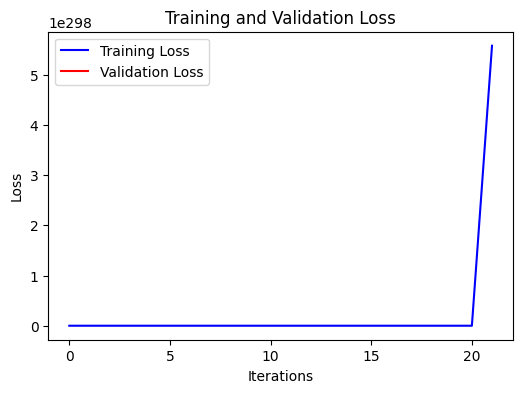

In [16]:
PlotLoss(training_cost_values[0,9],training_cost_values[0,9]-validation_cost_values[0,9],iterations,"Iterations","Loss","Training and Validation Loss")

Despite increasing the number of input parameters, the new loss graph remains largely the same to the original one. Thus, it can be concluded that increasing the number of input parameters does not necessarily increase the accuracy and efficiency of our model.

Problem 2 (30 points)

2.a) Repeat problem 1 a, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. In both cases, you do not need to normalize the output!

Plot the training and validation losses for both training and validation set based on input standardization and input normalization. Compare your training accuracy between both scaling approaches as well as the baseline training in problem 1 a. Which input scaling achieves the best training? Explain your results.

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X_1, Y_1, test_size = 0.20, random_state = 0)

Since there is a large amount of discrepency between the values within each of our inputs, the data will need to be standardized first. This will be done using the `StandardScaler` function from the `sklearn` library.

In [18]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [19]:
# Construct Tables For Use in Linear Regression
X_feature = ConstructData(X_train,m)
X_test_feature = ConstructData(X_test,n)
print(X_feature[:5])

[[ 1.         -0.71677205 -1.29437561 -0.57330726 -0.93314164 -0.81914879]
 [ 1.         -0.53893631 -1.29437561 -0.57330726 -0.93314164 -0.81914879]
 [ 1.         -0.98820554 -1.29437561 -0.57330726 -0.93314164 -0.81914879]
 [ 1.         -0.72613182 -1.29437561 -0.57330726 -0.93314164 -0.81914879]
 [ 1.          2.20347795  0.05251643 -0.57330726 -0.93314164 -0.81914879]]


In [20]:
iterations = 50
alpha_values = np.arange(0.01,0.11,0.01)
theta_values = np.zeros((1,len(alpha_values),X_feature.shape[1]))     # Construct 3D-array to hold each pair of theta values for every alpha and X
training_cost_values = np.zeros((1,len(alpha_values),iterations))     # Construuct 3D-array to hold each set of cost history for every alpha and X
validation_cost_values = np.zeros((1,len(alpha_values),iterations))   # Construuct 3D-array to hold each set of cost history for every alpha and X
test_cost = 0
i = 0
j = 0
for alpha in alpha_values:
  theta = theta_values[0,j]
  theta, train_cost_history = GradientDescent(X_feature,Y_train,theta,alpha,iterations)
  print("Theta ",i, ':',j," = ",theta)
  theta_values[0,j] = theta
  training_cost_values[0,j] = train_cost_history
  theta, valid_cost_history = GradientDescent(X_test_feature,Y_test,theta,alpha,iterations)
  validation_cost_values[0,j] = valid_cost_history
  j = j+1
print("Finished Computation")

Theta  0 : 0  =  [1887136.91090731  354673.19029595  216766.97981342  318139.99515733
  254847.34367758  228708.62194661]
Theta  0 : 1  =  [3037765.3071431   525180.32032153  269366.17330814  450168.39727843
  355616.98067174  310087.26726848]
Theta  0 : 2  =  [3735798.37392633  612560.66043887  266922.59630833  507836.32168272
  397730.31744078  333932.64835261]
Theta  0 : 3  =  [4157088.24652032  660603.15741897  249719.76894955  535396.83637183
  417602.60381907  336556.07218512]
Theta  0 : 4  =  [4410020.16241174  688830.58082003  231479.57391801  550246.90951526
  428769.1007707   332308.98818401]
Theta  0 : 5  =  [4561061.5093767   706347.68710871  216114.42718487  559266.28230673
  436157.52375819  326636.59112002]
Theta  0 : 6  =  [4650764.75343643  717666.71409763  204165.27563044  565263.69726077
  441568.32857289  321430.38528257]
Theta  0 : 7  =  [4703742.00438748  725186.48794041  195174.397118    569473.93846348
  445707.86020707  317202.8856484 ]
Theta  0 : 8  =  [473485

Cost Index =  [0 9]
Minimum Cost =  813418819266.958


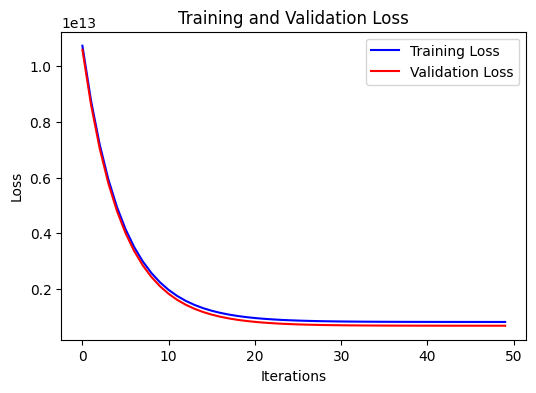

In [21]:
cost_min, cost_index = FindMinCost(training_cost_values)
print("Cost Index = ",cost_index)
print("Minimum Cost = ",cost_min)
PlotLoss(training_cost_values[0,cost_index[1]],training_cost_values[0,cost_index[1]]-validation_cost_values[0,cost_index[1]],iterations,"Iterations","Loss","Training and Validation Loss")

In [22]:
validation_1 = training_cost_values[0,cost_index[1],-1]-validation_cost_values[0,cost_index[1],-1]

This time, we'll use normalization. For this, we need to include the `normalize` library.



In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X_1, Y_1, test_size = 0.20, random_state = 0)

In [24]:
from sklearn.preprocessing import normalize
X_train = normalize(X_train)
X_test = normalize(X_test)

In [25]:
# Construct Tables For Use in Linear Regression
X_feature = ConstructData(X_train,m)
X_test_feature = ConstructData(X_test,n)
print(X_feature[:5])

[[1.00000000e+00 9.99999771e-01 5.52486061e-04 2.76243031e-04
  2.76243031e-04 0.00000000e+00]
 [1.00000000e+00 9.99999813e-01 4.99999906e-04 2.49999953e-04
  2.49999953e-04 0.00000000e+00]
 [1.00000000e+00 9.99999675e-01 6.57894523e-04 3.28947262e-04
  3.28947262e-04 0.00000000e+00]
 [1.00000000e+00 9.99999769e-01 5.55555427e-04 2.77777713e-04
  2.77777713e-04 0.00000000e+00]
 [1.00000000e+00 9.99999943e-01 3.04259618e-04 1.01419873e-04
  1.01419873e-04 0.00000000e+00]]


In [26]:
iterations = 50
alpha_values = np.arange(0.01,0.11,0.01)
theta_values = np.zeros((1,len(alpha_values),X_feature.shape[1]))     # Construct 3D-array to hold each pair of theta values for every alpha and X
training_cost_values = np.zeros((1,len(alpha_values),iterations))     # Construuct 3D-array to hold each set of cost history for every alpha and X
validation_cost_values = np.zeros((1,len(alpha_values),iterations))   # Construuct 3D-array to hold each set of cost history for every alpha and X
i = 0
j = 0
for alpha in alpha_values:
  theta = theta_values[0,j]
  theta, train_cost_history = GradientDescent(X_feature,Y_train,theta,alpha,iterations)
  print("Theta ",i, ':',j," = ",theta)
  theta_values[0,j] = theta
  training_cost_values[0,j] = train_cost_history
  theta, valid_cost_history = GradientDescent(X_test_feature,Y_test,theta,alpha,iterations)
  validation_cost_values[0,j] = valid_cost_history
  j = j+1
print("Finished Computation")

Theta  0 : 0  =  [1.51888271e+06 1.51888211e+06 9.23687053e+02 4.14230981e+02
 5.95390314e+02 2.40989834e+02]
Theta  0 : 1  =  [2.07854425e+06 2.07854347e+06 1.21725867e+03 5.59428252e+02
 8.08010360e+02 3.50843358e+02]
Theta  0 : 2  =  [2.28053092e+06 2.28053012e+06 1.27587253e+03 6.04308099e+02
 8.77902841e+02 4.11798709e+02]
Theta  0 : 3  =  [2.35187118e+06 2.35187042e+06 1.24866435e+03 6.12545421e+02
 8.95661819e+02 4.54893229e+02]
Theta  0 : 4  =  [2.37650635e+06 2.37650564e+06 1.19077545e+03 6.07683318e+02
 8.94783468e+02 4.91602636e+02]
Theta  0 : 5  =  [2.38481541e+06 2.38481476e+06 1.12216188e+03 5.98242218e+02
 8.87390305e+02 5.26080081e+02]
Theta  0 : 6  =  [2.38754981e+06 2.38754922e+06 1.04988631e+03 5.87237588e+02
 8.77772616e+02 5.59795406e+02]
Theta  0 : 7  =  [2.38842679e+06 2.38842627e+06 9.76390587e+02 5.75712007e+02
 8.67413738e+02 5.93256801e+02]
Theta  0 : 8  =  [2.38870057e+06 2.38870012e+06 9.02498629e+02 5.64017246e+02
 8.56814161e+02 6.26635731e+02]
Theta  0 :

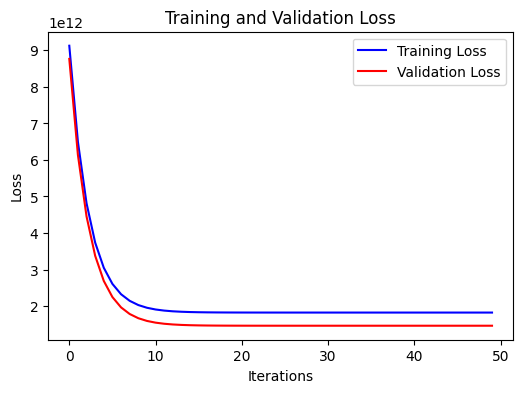

In [27]:
PlotLoss(training_cost_values[0,cost_index[1]],training_cost_values[0,cost_index[1]]-validation_cost_values[0,cost_index[1]],iterations,"Iterations","Loss","Training and Validation Loss")

In [28]:
validation_2 = training_cost_values[0,cost_index[1],-1]-validation_cost_values[0,cost_index[1],-1]
print("Difference of Validation = ",validation_2 - validation_1)

Difference of Validation =  783629618944.5332


Using pre-processing logic to equalize the data, we reduce computation error and get a much more accurate picture of the training performed by the model. While both normalization and standardization produce far better results than not using anything, the difference between the training and validation loss is much lower with normalization, and so I would say that it performs better.

2.b) Repeat problem 1 b, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. In both cases, you do not need to normalize the output!

Plot the training and validation losses for both training and validation sets based on input standardization and input normalization. Compare your training accuracy between both scaling approaches and the baseline training in problem 1 b. Which input scaling achieves the best training? Explain your results.

We will perform the same exercise as before, but now using the data from 1.b. Starting with standardization...

Theta  0 : 0  =  [1.51888271e+06 1.51888211e+06 9.23687053e+02 4.14230981e+02
 5.95390314e+02 2.40989834e+02]
Theta  0 : 1  =  [2.07854425e+06 2.07854347e+06 1.21725867e+03 5.59428252e+02
 8.08010360e+02 3.50843358e+02]
Theta  0 : 2  =  [2.28053092e+06 2.28053012e+06 1.27587253e+03 6.04308099e+02
 8.77902841e+02 4.11798709e+02]
Theta  0 : 3  =  [2.35187118e+06 2.35187042e+06 1.24866435e+03 6.12545421e+02
 8.95661819e+02 4.54893229e+02]
Theta  0 : 4  =  [2.37650635e+06 2.37650564e+06 1.19077545e+03 6.07683318e+02
 8.94783468e+02 4.91602636e+02]
Theta  0 : 5  =  [2.38481541e+06 2.38481476e+06 1.12216188e+03 5.98242218e+02
 8.87390305e+02 5.26080081e+02]
Theta  0 : 6  =  [2.38754981e+06 2.38754922e+06 1.04988631e+03 5.87237588e+02
 8.77772616e+02 5.59795406e+02]
Theta  0 : 7  =  [2.38842679e+06 2.38842627e+06 9.76390587e+02 5.75712007e+02
 8.67413738e+02 5.93256801e+02]
Theta  0 : 8  =  [2.38870057e+06 2.38870012e+06 9.02498629e+02 5.64017246e+02
 8.56814161e+02 6.26635731e+02]
Theta  0 :

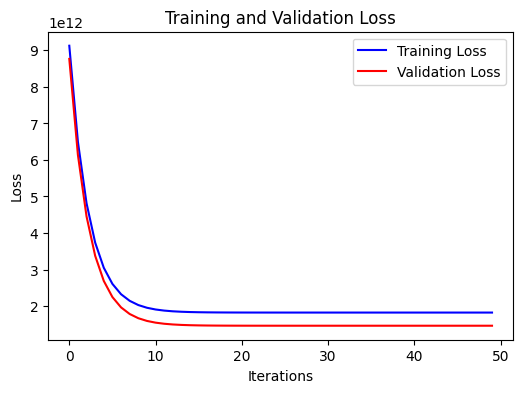

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X_2, Y_2, test_size = 0.20, random_state = 0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

iterations = 50
alpha_values = np.arange(0.01,0.11,0.01)
theta_values = np.zeros((1,len(alpha_values),X_feature.shape[1]))     # Construct 3D-array to hold each pair of theta values for every alpha and X
training_cost_values = np.zeros((1,len(alpha_values),iterations))     # Construuct 3D-array to hold each set of cost history for every alpha and X
validation_cost_values = np.zeros((1,len(alpha_values),iterations))   # Construuct 3D-array to hold each set of cost history for every alpha and X
i = 0
j = 0
for alpha in alpha_values:
  theta = theta_values[0,j]
  theta, train_cost_history = GradientDescent(X_feature,Y_train,theta,alpha,iterations)
  print("Theta ",i, ':',j," = ",theta)
  theta_values[0,j] = theta
  training_cost_values[0,j] = train_cost_history
  theta, valid_cost_history = GradientDescent(X_test_feature,Y_test,theta,alpha,iterations)
  validation_cost_values[0,j] = valid_cost_history
  j = j+1
print("Finished Computation")

PlotLoss(training_cost_values[0,cost_index[1]],training_cost_values[0,cost_index[1]]-validation_cost_values[0,cost_index[1]],iterations,"Iterations","Loss","Training and Validation Loss")

In [30]:
validation_1 = training_cost_values[0,cost_index[1],-1]-validation_cost_values[0,cost_index[1],-1]

And now using normalization...

Theta  0 : 0  =  [1.51888271e+06 1.51888211e+06 9.23687053e+02 4.14230981e+02
 5.95390314e+02 2.40989834e+02]
Theta  0 : 1  =  [2.07854425e+06 2.07854347e+06 1.21725867e+03 5.59428252e+02
 8.08010360e+02 3.50843358e+02]
Theta  0 : 2  =  [2.28053092e+06 2.28053012e+06 1.27587253e+03 6.04308099e+02
 8.77902841e+02 4.11798709e+02]
Theta  0 : 3  =  [2.35187118e+06 2.35187042e+06 1.24866435e+03 6.12545421e+02
 8.95661819e+02 4.54893229e+02]
Theta  0 : 4  =  [2.37650635e+06 2.37650564e+06 1.19077545e+03 6.07683318e+02
 8.94783468e+02 4.91602636e+02]
Theta  0 : 5  =  [2.38481541e+06 2.38481476e+06 1.12216188e+03 5.98242218e+02
 8.87390305e+02 5.26080081e+02]
Theta  0 : 6  =  [2.38754981e+06 2.38754922e+06 1.04988631e+03 5.87237588e+02
 8.77772616e+02 5.59795406e+02]
Theta  0 : 7  =  [2.38842679e+06 2.38842627e+06 9.76390587e+02 5.75712007e+02
 8.67413738e+02 5.93256801e+02]
Theta  0 : 8  =  [2.38870057e+06 2.38870012e+06 9.02498629e+02 5.64017246e+02
 8.56814161e+02 6.26635731e+02]
Theta  0 :

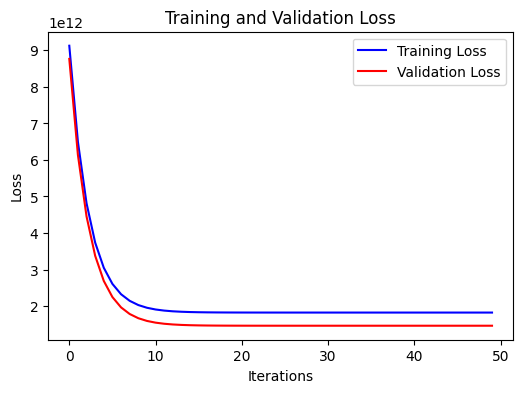

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X_2, Y_2, test_size = 0.20, random_state = 0)
X_train = normalize(X_train)
X_test = normalize(X_test)

iterations = 50
alpha_values = np.arange(0.01,0.11,0.01)
theta_values = np.zeros((1,len(alpha_values),X_feature.shape[1]))     # Construct 3D-array to hold each pair of theta values for every alpha and X
training_cost_values = np.zeros((1,len(alpha_values),iterations))     # Construuct 3D-array to hold each set of cost history for every alpha and X
validation_cost_values = np.zeros((1,len(alpha_values),iterations))   # Construuct 3D-array to hold each set of cost history for every alpha and X
i = 0
j = 0
for alpha in alpha_values:
  theta = theta_values[0,j]
  theta, train_cost_history = GradientDescent(X_feature,Y_train,theta,alpha,iterations)
  print("Theta ",i, ':',j," = ",theta)
  theta_values[0,j] = theta
  training_cost_values[0,j] = train_cost_history
  theta, valid_cost_history = GradientDescent(X_test_feature,Y_test,theta,alpha,iterations)
  validation_cost_values[0,j] = valid_cost_history
  j = j+1
print("Finished Computation")

PlotLoss(training_cost_values[0,cost_index[1]],training_cost_values[0,cost_index[1]]-validation_cost_values[0,cost_index[1]],iterations,"Iterations","Loss","Training and Validation Loss")

In [32]:
validation_2 = training_cost_values[0,cost_index[1],-1]-validation_cost_values[0,cost_index[1],-1]
print("Difference of Validation = ",validation_2 - validation_1)

Difference of Validation =  0.0


Similar to the first problem, both graphs are nearly identical to their 2.a counterparts. However, an interesting aspect is that both graphs are nearly identical to each other as well (something that couldn't have been said for the graphs in 2.a). As with the last part, using normalization and standardization in this case produce better results than not using either. However, this time around there is no optimal choice, as the wide margin of inputs has reduced the difference in validation between the two graphs to 0.0.

Problem 3 (40 points)

3.a) Repeat problem 2 a, this time by adding a parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.  

Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 a.

In [33]:
def GradientDescentWithPenalty(X,Y,theta,alpha,iterations,lambda_=0,penalty='l2'):
  cost_history = np.zeros(iterations)         # Initializes empty array of size "iterations"
  for i in range(iterations):
    predictions = X.dot(theta)                # Scales X array by current theta value
    errors = np.subtract(predictions,Y)       # Computes the difference between every element of predictions[] and Y[]
    if penalty == 'l2':
      sum_delta = (alpha / m) * (X.T.dot(errors) + lambda_ * theta)
    elif penalty == 'l1':
      sum_delta = (alpha / m) * (X.T.dot(errors) + lambda_ * np.sign(theta))
    else:
      sum_delta = (alpha / m) * X.T.dot(errors)
    theta = theta - sum_delta                 # New theta is found by taking the difference between current value and solved delta value
    cost_history[i] = ComputeCost(X,Y,theta)  # Computes the cost for the current theta value
  return theta, cost_history

Using Standardization with Ridge Regression:

Theta  0 : 0  =  [1.48329845e+06 1.48329787e+06 9.02355109e+02 4.04575379e+02
 5.81486104e+02 2.35205251e+02]
Theta  0 : 1  =  [1.99890373e+06 1.99890298e+06 1.17296972e+03 5.38367080e+02
 7.77390904e+02 3.36342388e+02]
Theta  0 : 2  =  [2.17401331e+06 2.17401254e+06 1.22364045e+03 5.77252204e+02
 8.37962450e+02 3.89251498e+02]
Theta  0 : 3  =  [2.23205669e+06 2.23205595e+06 1.20093861e+03 5.83864422e+02
 8.52329719e+02 4.24568050e+02]
Theta  0 : 4  =  [2.25081359e+06 2.25081290e+06 1.15576820e+03 5.79988535e+02
 8.51502714e+02 4.53010803e+02]
Theta  0 : 5  =  [2.25671583e+06 2.25671518e+06 1.10531265e+03 5.73009337e+02
 8.46002873e+02 4.78274181e+02]
Theta  0 : 6  =  [2.25852201e+06 2.25852140e+06 1.05515527e+03 5.65356312e+02
 8.39300647e+02 5.01632214e+02]
Theta  0 : 7  =  [2.25905880e+06 2.25905823e+06 1.00699166e+03 5.57796628e+02
 8.32500680e+02 5.23543918e+02]
Theta  0 : 8  =  [2.25921349e+06 2.25921297e+06 9.61251969e+02 5.50554881e+02
 8.25934968e+02 5.44199342e+02]
Theta  0 :

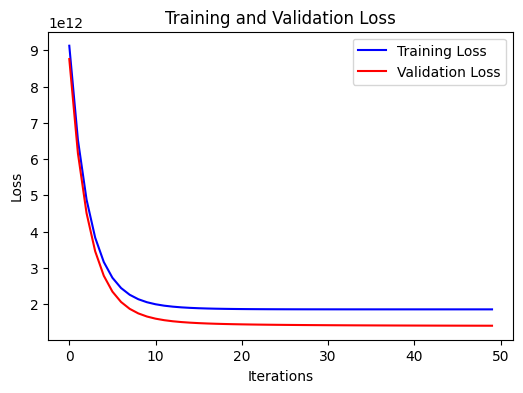

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X_1, Y_1, test_size = 0.20, random_state = 0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

iterations = 50
alpha_values = np.arange(0.01,0.11,0.01)
theta_values = np.zeros((1,len(alpha_values),X_feature.shape[1]))     # Construct 3D-array to hold each pair of theta values for every alpha and X
training_cost_values = np.zeros((1,len(alpha_values),iterations))     # Construuct 3D-array to hold each set of cost history for every alpha and X
validation_cost_values = np.zeros((1,len(alpha_values),iterations))   # Construuct 3D-array to hold each set of cost history for every alpha and X
i = 0
j = 0
for alpha in alpha_values:
  theta = theta_values[0,j]
  theta, train_cost_history = GradientDescentWithPenalty(X_feature,Y_train,theta,alpha,iterations,50,'l2')
  print("Theta ",i, ':',j," = ",theta)
  theta_values[0,j] = theta
  training_cost_values[0,j] = train_cost_history
  theta, valid_cost_history = GradientDescentWithPenalty(X_test_feature,Y_test,theta,alpha,iterations,50,'l2')
  validation_cost_values[0,j] = valid_cost_history
  j = j+1
print("Finished Computation")

PlotLoss(training_cost_values[0,cost_index[1]],training_cost_values[0,cost_index[1]]-validation_cost_values[0,cost_index[1]],iterations,"Iterations","Loss","Training and Validation Loss")

Using Normalization with Ridge Regression:

Theta  0 : 0  =  [1.48329845e+06 1.48329787e+06 9.02355109e+02 4.04575379e+02
 5.81486104e+02 2.35205251e+02]
Theta  0 : 1  =  [1.99890373e+06 1.99890298e+06 1.17296972e+03 5.38367080e+02
 7.77390904e+02 3.36342388e+02]
Theta  0 : 2  =  [2.17401331e+06 2.17401254e+06 1.22364045e+03 5.77252204e+02
 8.37962450e+02 3.89251498e+02]
Theta  0 : 3  =  [2.23205669e+06 2.23205595e+06 1.20093861e+03 5.83864422e+02
 8.52329719e+02 4.24568050e+02]
Theta  0 : 4  =  [2.25081359e+06 2.25081290e+06 1.15576820e+03 5.79988535e+02
 8.51502714e+02 4.53010803e+02]
Theta  0 : 5  =  [2.25671583e+06 2.25671518e+06 1.10531265e+03 5.73009337e+02
 8.46002873e+02 4.78274181e+02]
Theta  0 : 6  =  [2.25852201e+06 2.25852140e+06 1.05515527e+03 5.65356312e+02
 8.39300647e+02 5.01632214e+02]
Theta  0 : 7  =  [2.25905880e+06 2.25905823e+06 1.00699166e+03 5.57796628e+02
 8.32500680e+02 5.23543918e+02]
Theta  0 : 8  =  [2.25921349e+06 2.25921297e+06 9.61251969e+02 5.50554881e+02
 8.25934968e+02 5.44199342e+02]
Theta  0 :

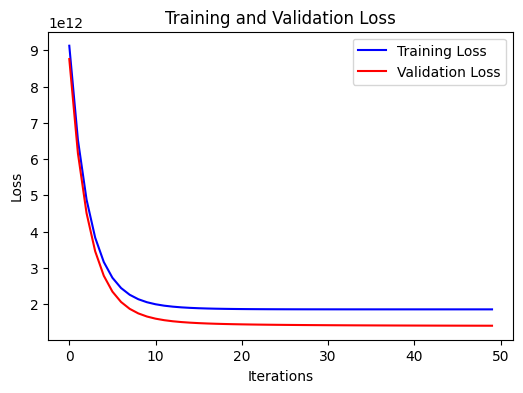

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X_1, Y_1, test_size = 0.20, random_state = 0)
X_train = normalize(X_train)
X_test = normalize(X_test)

iterations = 50
alpha_values = np.arange(0.01,0.11,0.01)
theta_values = np.zeros((1,len(alpha_values),X_feature.shape[1]))     # Construct 3D-array to hold each pair of theta values for every alpha and X
training_cost_values = np.zeros((1,len(alpha_values),iterations))     # Construuct 3D-array to hold each set of cost history for every alpha and X
validation_cost_values = np.zeros((1,len(alpha_values),iterations))   # Construuct 3D-array to hold each set of cost history for every alpha and X
i = 0
j = 0
for alpha in alpha_values:
  theta = theta_values[0,j]
  theta, train_cost_history = GradientDescentWithPenalty(X_feature,Y_train,theta,alpha,iterations,50,'l2')
  print("Theta ",i, ':',j," = ",theta)
  theta_values[0,j] = theta
  training_cost_values[0,j] = train_cost_history
  theta, valid_cost_history = GradientDescentWithPenalty(X_test_feature,Y_test,theta,alpha,iterations,50,'l2')
  validation_cost_values[0,j] = valid_cost_history
  j = j+1
print("Finished Computation")

PlotLoss(training_cost_values[0,cost_index[1]],training_cost_values[0,cost_index[1]]-validation_cost_values[0,cost_index[1]],iterations,"Iterations","Loss","Training and Validation Loss")

Despite the addition of paramater penalty (an increase in error for each theta value at play to avoid overfitting), the graphs have not changed much. This could be due to the dataset we are using for this assignment, or it could be due to using too small a value for lambda.


3.b) Repeat problem 2 b, this time by adding a parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.  

Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 b.

Using Standardization with Ridge Regression:

Theta  0 : 0  =  [1.48329845e+06 1.48329787e+06 9.02355109e+02 4.04575379e+02
 5.81486104e+02 2.35205251e+02]
Theta  0 : 1  =  [1.99890373e+06 1.99890298e+06 1.17296972e+03 5.38367080e+02
 7.77390904e+02 3.36342388e+02]
Theta  0 : 2  =  [2.17401331e+06 2.17401254e+06 1.22364045e+03 5.77252204e+02
 8.37962450e+02 3.89251498e+02]
Theta  0 : 3  =  [2.23205669e+06 2.23205595e+06 1.20093861e+03 5.83864422e+02
 8.52329719e+02 4.24568050e+02]
Theta  0 : 4  =  [2.25081359e+06 2.25081290e+06 1.15576820e+03 5.79988535e+02
 8.51502714e+02 4.53010803e+02]
Theta  0 : 5  =  [2.25671583e+06 2.25671518e+06 1.10531265e+03 5.73009337e+02
 8.46002873e+02 4.78274181e+02]
Theta  0 : 6  =  [2.25852201e+06 2.25852140e+06 1.05515527e+03 5.65356312e+02
 8.39300647e+02 5.01632214e+02]
Theta  0 : 7  =  [2.25905880e+06 2.25905823e+06 1.00699166e+03 5.57796628e+02
 8.32500680e+02 5.23543918e+02]
Theta  0 : 8  =  [2.25921349e+06 2.25921297e+06 9.61251969e+02 5.50554881e+02
 8.25934968e+02 5.44199342e+02]
Theta  0 :

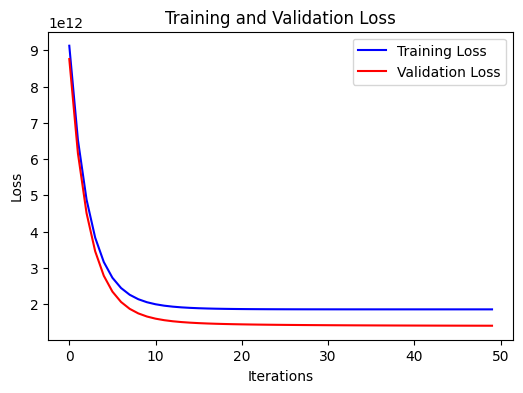

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X_2, Y_2, test_size = 0.20, random_state = 0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

iterations = 50
alpha_values = np.arange(0.01,0.11,0.01)
theta_values = np.zeros((1,len(alpha_values),X_feature.shape[1]))     # Construct 3D-array to hold each pair of theta values for every alpha and X
training_cost_values = np.zeros((1,len(alpha_values),iterations))     # Construuct 3D-array to hold each set of cost history for every alpha and X
validation_cost_values = np.zeros((1,len(alpha_values),iterations))   # Construuct 3D-array to hold each set of cost history for every alpha and X
i = 0
j = 0
for alpha in alpha_values:
  theta = theta_values[0,j]
  theta, train_cost_history = GradientDescentWithPenalty(X_feature,Y_train,theta,alpha,iterations,50,'l2')
  print("Theta ",i, ':',j," = ",theta)
  theta_values[0,j] = theta
  training_cost_values[0,j] = train_cost_history
  theta, valid_cost_history = GradientDescentWithPenalty(X_test_feature,Y_test,theta,alpha,iterations,50,'l2')
  validation_cost_values[0,j] = valid_cost_history
  j = j+1
print("Finished Computation")

PlotLoss(training_cost_values[0,cost_index[1]],training_cost_values[0,cost_index[1]]-validation_cost_values[0,cost_index[1]],iterations,"Iterations","Loss","Training and Validation Loss")

Using Normalization with Ridge Regression:

Theta  0 : 0  =  [1.48329845e+06 1.48329787e+06 9.02355109e+02 4.04575379e+02
 5.81486104e+02 2.35205251e+02]
Theta  0 : 1  =  [1.99890373e+06 1.99890298e+06 1.17296972e+03 5.38367080e+02
 7.77390904e+02 3.36342388e+02]
Theta  0 : 2  =  [2.17401331e+06 2.17401254e+06 1.22364045e+03 5.77252204e+02
 8.37962450e+02 3.89251498e+02]
Theta  0 : 3  =  [2.23205669e+06 2.23205595e+06 1.20093861e+03 5.83864422e+02
 8.52329719e+02 4.24568050e+02]
Theta  0 : 4  =  [2.25081359e+06 2.25081290e+06 1.15576820e+03 5.79988535e+02
 8.51502714e+02 4.53010803e+02]
Theta  0 : 5  =  [2.25671583e+06 2.25671518e+06 1.10531265e+03 5.73009337e+02
 8.46002873e+02 4.78274181e+02]
Theta  0 : 6  =  [2.25852201e+06 2.25852140e+06 1.05515527e+03 5.65356312e+02
 8.39300647e+02 5.01632214e+02]
Theta  0 : 7  =  [2.25905880e+06 2.25905823e+06 1.00699166e+03 5.57796628e+02
 8.32500680e+02 5.23543918e+02]
Theta  0 : 8  =  [2.25921349e+06 2.25921297e+06 9.61251969e+02 5.50554881e+02
 8.25934968e+02 5.44199342e+02]
Theta  0 :

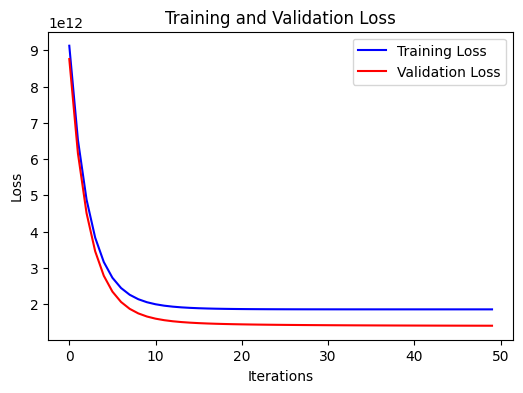

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X_2, Y_2, test_size = 0.20, random_state = 0)
X_train = normalize(X_train)
X_test = normalize(X_test)

iterations = 50
alpha_values = np.arange(0.01,0.11,0.01)
theta_values = np.zeros((1,len(alpha_values),X_feature.shape[1]))     # Construct 3D-array to hold each pair of theta values for every alpha and X
training_cost_values = np.zeros((1,len(alpha_values),iterations))     # Construuct 3D-array to hold each set of cost history for every alpha and X
validation_cost_values = np.zeros((1,len(alpha_values),iterations))   # Construuct 3D-array to hold each set of cost history for every alpha and X
i = 0
j = 0
for alpha in alpha_values:
  theta = theta_values[0,j]
  theta, train_cost_history = GradientDescentWithPenalty(X_feature,Y_train,theta,alpha,iterations,50,'l2')
  print("Theta ",i, ':',j," = ",theta)
  theta_values[0,j] = theta
  training_cost_values[0,j] = train_cost_history
  theta, valid_cost_history = GradientDescentWithPenalty(X_test_feature,Y_test,theta,alpha,iterations,50,'l2')
  validation_cost_values[0,j] = valid_cost_history
  j = j+1
print("Finished Computation")

PlotLoss(training_cost_values[0,cost_index[1]],training_cost_values[0,cost_index[1]]-validation_cost_values[0,cost_index[1]],iterations,"Iterations","Loss","Training and Validation Loss")

Just as with 3.a, the graphs between problems 2 and 3 aren't very different from one another. However, by tweaking the lambda value we are able to control how close or how far the validation line gets from the training line.